# Tercera entrega
## Curso Data Science 
____________________________________________________

## Estructurando un proyecto de Data Science (Parte I)
____________________________________________________
### Estudiante: Marvin Cruz Sandoval DNI: 95711072
### Profesor: Octavio Lafourcade
### Tutor: Giuliano Crena

________________________
_______________________

*Objetivo:* Crear un "Abstract", generar hipótesis y preguntas de interés para posteriormente mediante tablas y gráficos obtener las interpretaciones y las respuestas a las cuestiones planteadas. 

## 1. Abstract

---

El desarrollo energético de LATAM y el CARIBE ha estado fuertemente relacionado a las tendencias mundiales pero también a situaciones pariculares de cada país.

Dentro del ámbito energético es importante conocer las tendencias y contar con estimaciones y proyecciones de ciertos parámetros a la hora de la toma de decisiones estratégicas. 

El presente proyecto tendrá como finalidad en prmera instancia realizar un análisis descriptivo de la información disponible. 

Posteriormente se realizará una limpeza y adecuación de los datos para un correcto análisis. Se verifica la presencia de valores nulos y atípicos para verificar si existen registros que no deberán ser considerados en el análisis. 

Luego de la realización de la adecuación del dataset, se realizan una serie de gráficas utilizando la librería Seaborn y con el apoyo de análisis numéricos, se realzan las observaciones y verificación de las hipótesis y preguntas planteadas al principio del análisis. 

El presente proyecto se justifica dada la importancia crítica que tiene el adecuado suministro de energía eléctrica como motor del desarrollo local, regional y mundial. Con el paso de los años las empresas de energia (públicas y privadas) han ido migrando hacia un paradigma de gestión *data driven*, impulsado primordialmente por la digitalización y la aparición de controles regulatorios producto de la privatización de este servicio en muchos paises, con lo que también se pone en escena la operación de organismos de fiscalización y control. De igual forma las diferentes preocupaciones a nivel internacional relacionadas con la seguridad del suministro eléctrico, así como mantener como objetivo una mejora en los indicadores de eficiencia y reducción de emanaciones de efecto invernadero hacen que el presente análisis sea de interés para diferentes perfiles interesados en obtener respuesta a diferentes cuestiones relacionadas.  

El dataset seleccionado contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales.

Toda la información ha sido compilada por el Banco Mundial, descargada del sitio: https://energydata.info/



## 2. Preguntas e hipótesis planteadas

---

### Hipótesis:
>La información disponible será menor a medida que los registros sean más antiguos. 

>A medida que los registros correspondan a periodos más actuales, se tendrá mayor disponibilidad de información.

>La distribución de pérdidas de energía es homogénea en todos los países de la región. 

>La duración de las interrupciones de energía es homogénea en toda la región

>La cantidad de clientes conectados a las redes de distribución se mantiene en crecimeinto constante y dicho crecimiento es homogéneo en todos los paises. 

### Preguntas formuladas:

>Los registros de pérdidas de energía muestran un incremento en la eficiencia de los sistemas a través del tiempo?

>Con la información disponible es posible proyectar los crecimientos de demanda por país? 

>Cual es la correlación que se tiene entre las distintas variables manejadas?

>Se puede definir si todos los paises registraron un patrón de crecimiento de consumo similar?

### 1. Importación de librerías a utilizar



In [1]:
#Importamos las librerias a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Selección y carga de Dataset

De los 3 Datasets presentados inicialmente, se decide continuar con el Dataset denominado _Datos de acceso a electricidad Latinoamérica y el Caribe_

Este Dataset contine información sobre los indicadores de acceso a energía eléctrica de los paises de América Latina y el caribe, basado en información proporcionada por diferentes empresas y organismos gubernamentales. 

Fuente de datos: https://energydata.info/


In [2]:
#Carga de archivo .csv a utilizar

df= pd.read_csv("2.Latam data energy access_world_bank.csv", sep=";", )



#Muestra de encabezado de Data Frame
df.head(5)


,_id,country,utility name,utility code,utility ID,year,Type of connection,1,2,3,...,16,17,18,19,20,21,22,23,24,25
0,1,country,utility name,utility code,utility ID,year,Type of connection,Total number of connections (residential and ...,Total Number of residential connections in the...,Total electricity sold per year (MWh),...,Number of residential subscribers per 100 hous...,Number of customer complaints per year,Average duration between customer complaint an...,Average residential tariff (local nominal curr...,Average industrial tariff (local nominal curre...,Installation Cost (residential) local nominal ...,Installation Cost (Industrial) local nominal c...,Year of privatization,Residencial conexions per employee,Energy sold per employee
1,2,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN


In [3]:
# Obtenemos las dimensiones del Dataset
df.shape

(4075, 32)

In [4]:
#Obtenemos la info de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   _id                 4075 non-null   int64 
 1   country             4075 non-null   object
 2   utility name        4075 non-null   object
 3   utility code        4061 non-null   object
 4   utility ID          4052 non-null   object
 5   year                4061 non-null   object
 6   Type of connection  4061 non-null   object
 7   1                   2899 non-null   object
 8   2                   2916 non-null   object
 9   3                   3190 non-null   object
 10  4                   1438 non-null   object
 11  5                   2550 non-null   object
 12  6                   818 non-null    object
 13  7                   497 non-null    object
 14  8                   1284 non-null   object
 15  9                   1143 non-null   object
 16  10                  1283

Al obtener las dimensiones mediante el método "shape" se logra determinar que el Data Frame posee 4075 filas y 32 columnas, por otra parte, las columnas contienen datos de tipo objeto. 

______________________________________________________________________________________________________________________

#### Observación importante: Se verifica que los datos del index se encuentran en la 3a fila del data set (del csv cargado), mientras que la fila 1 contiene un correlativo de las columnas y la fila 2 posee información explicativa del contenido de cada columna. 
  
#### Se genera un array para almacenar la información explicativa del contedido de cada celda y se define la información de la fila No. 3 como encabezados de columna.

### 3. Preparación del Dataset

In [5]:
# Creando array para guardar las descripción de los campos para futura referencia. 

df_desc = df.iloc[0].to_numpy()

#Eliminando la 1a columna que es redundante

df_desc = np.delete(df_desc, 0)


for a in df_desc:
    #print(f"Columna {df_desc.index[a]} : {a}")
    i = list(df_desc).index(a)
    print(f"Descripción de Columna {i}: {a}")

Descripción de Columna 0: country
Descripción de Columna 1: utility name
Descripción de Columna 2: utility code
Descripción de Columna 3: utility ID
Descripción de Columna 4: year
Descripción de Columna 5: Type of connection
Descripción de Columna 6:  Total number of connections (residential and non-residential) in the utility area
Descripción de Columna 7: Total Number of residential connections in the utility area
Descripción de Columna 8: Total electricity sold per year (MWh)
Descripción de Columna 9: Length of distribution network (km) 
Descripción de Columna 10: Total number of employees 
Descripción de Columna 11: Average wholesale price paid per MWh (local nominal currency)
Descripción de Columna 12: Average transmission charges per MWh purchased (local nominal currency)
Descripción de Columna 13: OPEX (operation expenditures) of the distribution services (local nominal currency)
Descripción de Columna 14: CAPEX (captial expenditures) of the distribution services (local nominal 

Luego se eliminan las primeras dos filas y se asigna la tercera como "index" para que el Data Frame sea cargado de manera correcta:

In [6]:
# Adecuando el dataset para el analisis
# Tomamos como encabezado lo contenido en fila 1

df.columns = df.iloc[1]

#Eliminamos las filas con infomación no relevante para el procesamiento del dataset

df=df.drop([0,1])

# Se elimina la columna 0 que no contiene información relevante, y que fue eliminada del array de descripción de campos 

df= df.drop(columns=[2])

# Se muestra el data set listo para el proceso de análisis
df.head()

1,country,name,code,id_conce,year,typ_conc,n_con,n_rd_con,mwh_sold,length_net,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
2,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1994,Elec - Distribution,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1995,Elec - Distribution,4.293.683.333,3.694.916.667,118861.9,NaN,...,NaN,NaN,NaN,4.985.647.636,1.735.030.265,NaN,NaN,0,NaN,NaN
4,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1996,Elec - Distribution,4.612.191.667,40018.5,124118.5,NaN,...,NaN,NaN,NaN,7.285.148.198,1.816.219.628,NaN,NaN,0,NaN,NaN
5,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1997,Elec - Distribution,5.046.158.333,4.385.358.333,134097.2,NaN,...,NaN,NaN,NaN,2.891.591.355,277.406.999,NaN,NaN,0,NaN,NaN
6,Ecuador,EMPRESA ELECTRICA LOS RIOS S.A.,LOS RIOS,201001,1998,Elec - Distribution,5.229.333.333,4.585.483.333,146304.8,NaN,...,NaN,NaN,NaN,2.985.768.958,295.955.862,NaN,NaN,0,NaN,NaN


Se desea saber la cantidad de valores NAN que se están manejando en el Dataset

In [7]:
# analizando valores NAN
df_nan=df.isna().sum()
df_nan

1
country               0
name                  0
code                 14
id_conce             23
year                 14
typ_conc             14
n_con              1176
n_rd_con           1159
mwh_sold            885
length_net         2637
n_wrks             1525
whosale_price_p    3257
transm_chrs_p      3578
opex               2791
capex              2932
totex              2792
d_losses           1575
d_losses_t         3521
d_losses_c         3525
dur_interr         2699
freq_interr        2793
coverage           2446
complains          3525
dur_problem        3739
avg_rd_tariff_p    1910
avg_in_tariff_p    2711
inst_rd_price_p    3662
inst_in_price_p    3922
d_priv              383
rd_cn_wkr          1916
mwh_wkr            1725
dtype: int64

>Se observa un alto porcentaje de valores NAN en muchos campos.

>Se asume que los valores NAN deberían corresponder a los periodos mas antiguos posiblemente por falta de registro de los parámetros 

### 4. Gráficas en Matplotlib

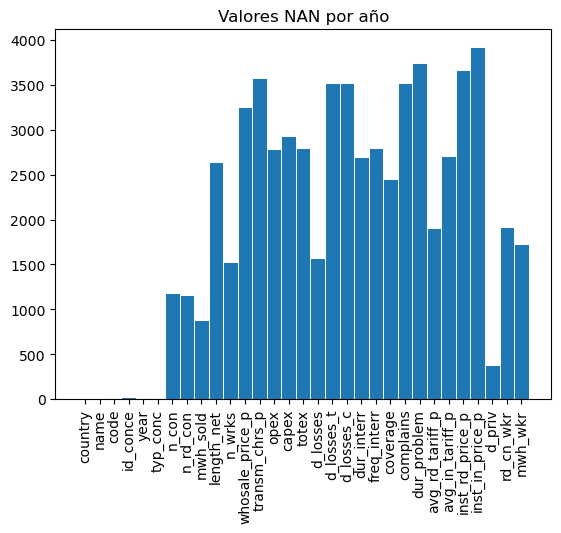

<Figure size 500x500 with 0 Axes>

In [8]:

# Contamos los valores NAN por año

#Para efectos de analisis del Data Set se pueden graficar la cantidad de valores NAN por columna:

fig, ax = plt.subplots()

ax.bar(df_nan.index, df_nan.values, width=1, edgecolor="white", linewidth=0.7 )
plt.xticks(rotation=90)
plt.figure(figsize=(5, 5))
ax.set_title('Valores NAN por año')

plt.show()

Se aprecia de manera gráfica que la cantidad de valores NAN es elevada para el dataset elegido. 

Como primera impresión se podría tender a pensar que el dataset no es adecuado para el análisis, no obstante dentro del comportamiento observado surge la interrogante de si la situación de los valores NAN tiene relación con l aantiguedad de los registros (En las decadas pasadas la información en general no estaba disponible, además presumiblemente no se gestionaban indicadores) 

Para verificar lo anterior se crea la siguiente grafica donde se totalizan los registros válidos disponibles (para todos los campos de datos) en función del año: 

In [9]:

#Obtenemos un Dataframe con el conteo de regitros agrupados por año

df_nancount=df.groupby('year').count()
df_nancount


1,country,name,code,id_conce,typ_conc,n_con,n_rd_con,mwh_sold,length_net,n_wrks,...,coverage,complains,dur_problem,avg_rd_tariff_p,avg_in_tariff_p,inst_rd_price_p,inst_in_price_p,d_priv,rd_cn_wkr,mwh_wkr
year,,,,,,,,,,,,,,,,,,,,,
1973,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1974,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1975,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1976,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1977,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1978,2,2,2,2,2,0,0,1,0,1,...,0,0,0,0,0,0,0,2,0,1
1979,2,2,2,2,2,0,0,1,0,1,...,0,0,0,0,0,0,0,2,0,1
1980,5,5,5,5,5,0,0,1,0,1,...,0,0,0,0,0,0,0,5,0,1
1981,5,5,5,5,5,0,1,1,0,1,...,0,0,0,1,0,0,0,5,1,1


Se seleccionan 3 parámetros para evaluar la cantidad de datos que se fueron obteniendo en el tiempo

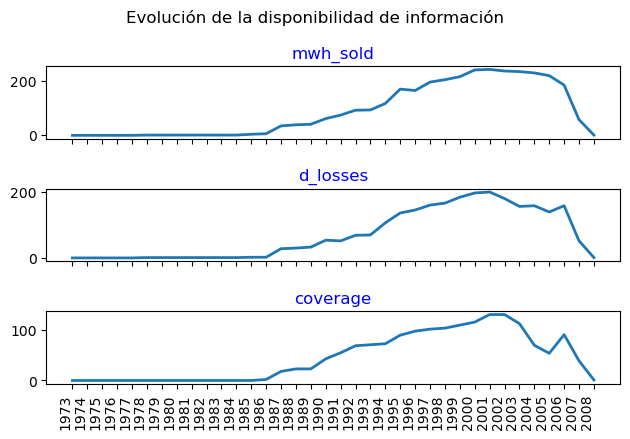

In [10]:
# Grafico de linea de 4 parámetros seleccionados para ver la evaluación de registros en el tiempo:

fig, ax = plt.subplots(3,1)



ax[0].plot(df_nancount.index, df_nancount['mwh_sold'], linewidth=2.0)

ax[1].plot(df_nancount.index, df_nancount['d_losses'], linewidth=2.0)

ax[2].plot(df_nancount.index, df_nancount['coverage'], linewidth=2.0)

#ax[1,1].plot(df_nancount.index, df_nancount['complains'], linewidth=2.0)




fig.suptitle("Evolución de la disponibilidad de información") # titulo general para mis graficos!
ax[0].set_title('mwh_sold', fontsize=12, color="blue") 
ax[1].set_title('d_losses', fontsize=12, color="blue") 
ax[2].set_title('coverage', fontsize=12, color="blue") 
#ax[1, 1].set_title('complains', fontsize=12, color="blue") 


#El sigiuente método es para mantener ajuste entre los subgráficos

fig.tight_layout()

#Rotamos el texto del gráfico

fig.autofmt_xdate(rotation=90)






Se observa que el tal como se presumía, la disponibilidad de información para los 2 parámetros elegidos comienza a ser relevante durante la década de 1980. El decrecimiento en los últimos períodos puede responder a la demora o  tiempo de "desclasificación" de la información por empresas y organismos de control. 

Tiene sentido pensar que en los últimos años la disponibilidad de la información se ha ido incrementando en todos los sectores, influenciado por el monitoreo de indicadores por parte de los organismos de control así como por la incursión de la gestión basada en sistemas de la información. 

Con el filtrado anterior se realizará la graficación de la evolución del % de perdidas totales en la res de distribución promediando por año y por país. Se decide utilizar un gráfico tipo línea. 

In [11]:
# Transformando los datos de perdidas porcentuales en valores numericos para procesamiento y graficación:

df['d_losses'] = pd.to_numeric(df['d_losses'], errors='coerce')
df['n_con'] = pd.to_numeric(df['n_con'], errors='coerce')
df['mwh_sold'] = pd.to_numeric(df['mwh_sold'], errors='coerce')


In [12]:
#Obteniendo el promedio de perdidas de energía por año para graficar:

df_meanloss=df.groupby('year').mean()
df_meanlosscountry=df.groupby('country').mean()

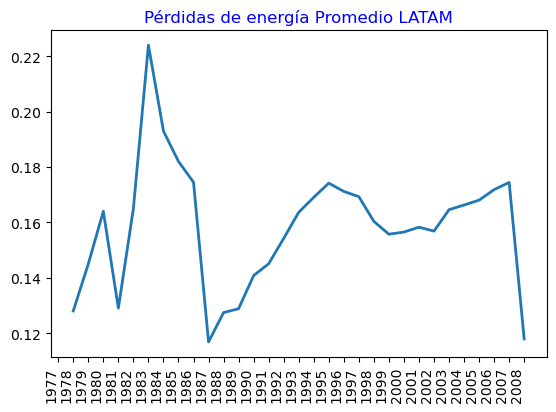

In [13]:
#Graficando la evolución del % de pérdidas promedio por año. 

fig, ax = plt.subplots()

ax.plot(df_meanloss.index, df_meanloss["d_losses"], linewidth=2.0)
ax.set_title("Pérdidas de energía Promedio LATAM", fontsize=12, color="blue") 
fig.autofmt_xdate(rotation=90)


Observaciones importantes:

>>Se observan registros de pérdidas de energía a partir de 1978. 

>>Durante la década de los 80´ se registra un incremento en el índice de pérdidas de energía en la región llegando a un pico de 22%

>>En la década del 2000 los niveles promedio de pérdidas de energía en las redes se situan en el orden del 15%. 

>>A partir del 2007 se ve una caida abrupta, relacionada con al poca disponibilidad de información, por lo que se determina que el anális es valido hasta 2007. 

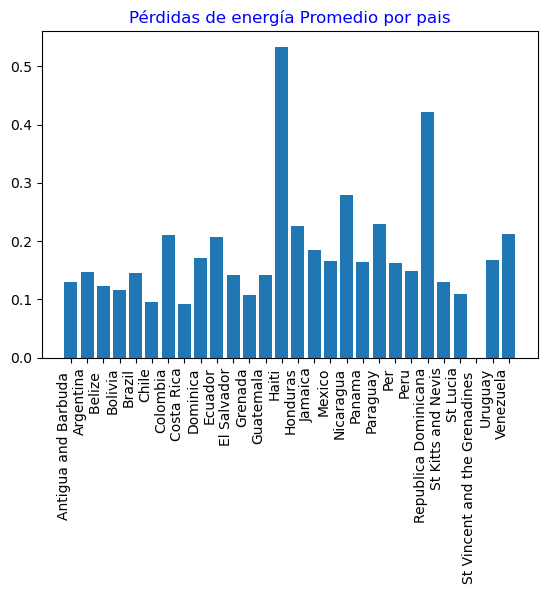

In [14]:
#Graficando la evolución del % de pérdidas promedio por pais. 

fig, ax = plt.subplots()

ax.bar(df_meanlosscountry.index, df_meanlosscountry["d_losses"], linewidth=2.0)
ax.set_title("Pérdidas de energía Promedio por pais", fontsize=12, color="blue") 
#Agregamos rotacion a nombre de pais para mejorar la visualizacion 
fig.autofmt_xdate(rotation=90)


Observaciones importantes:

>Destacan Haití y República Dominicana con niveles de pérdidas muy por encima del promedio regional

>Costa Rica y Chile destacan por su indicador menor que el promedio.

### 5. Graficas en Seaborn

Para el presente apartado se buscará analizar si existe relación entre las perdidas de energía vs la energía transportada, asi como los parámetros por pais, mediante un boxplot con el que ademas se verificara si existen outlyers. 
Por otra parte se buscará determinar si existe relación entre las pérdidas de energia y el volumen de energía manejado.

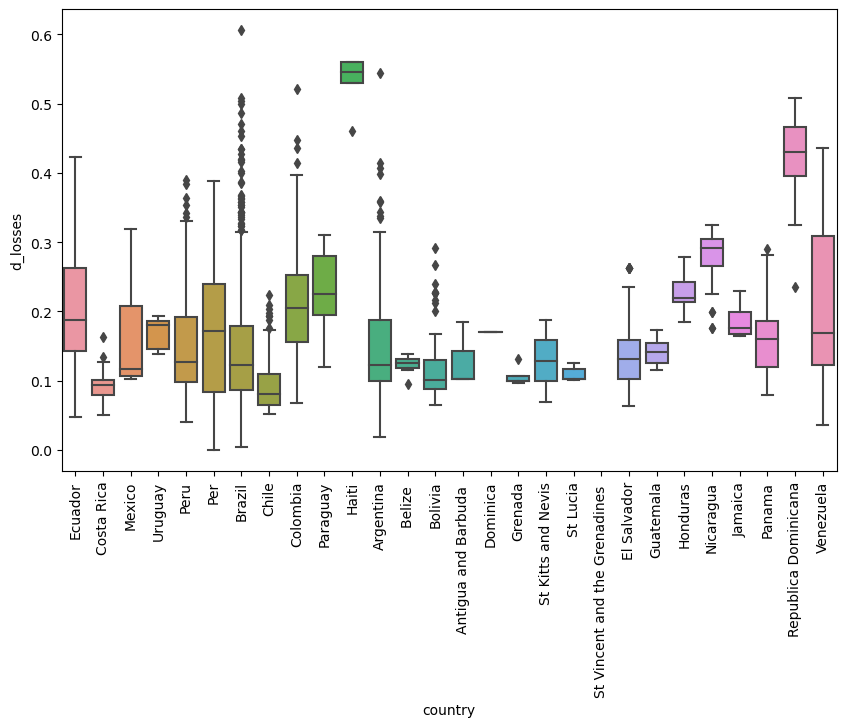

In [15]:
# Obteniendo la tabla para graficar

from matplotlib import rcParams
# Aumentmos el tamaño de la grafica para observar claramente la grafica. 
rcParams['figure.figsize'] = 10,6

#Creamos el boxplot.
boxplot=sns.boxplot(x="country",
                y="d_losses",
                data=df)

#Agregamos rotación a los ejes:
a=boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90)


Se observa que Brasil posee la mayor cantidad de valores outlyers, seguido por Argentina y Bolivia. Para el caso de Haiti se considera que tiene la mayor cantidad de Perdidas de energía de la region, con un promedio, y valores caracteisticos del boxplot excepcionalmente altos comparados con el resto de paises. 

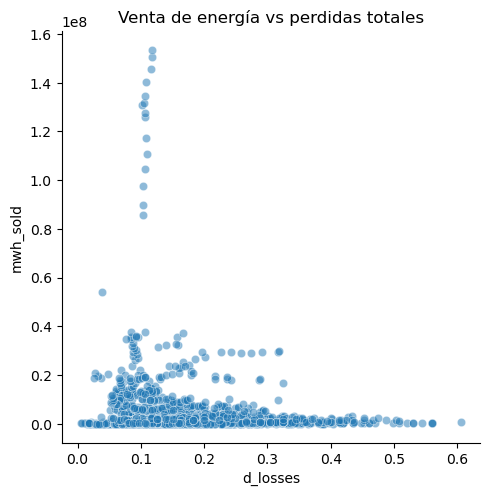

In [16]:
#Creamos grafico Energia vendida vs perdidas de energía

sns.relplot(data=df, x="d_losses", y="mwh_sold",alpha=0.5).set(title='Venta de energía vs perdidas totales')


Se aprecia que las perdidas de energía tienen mayor concentración en torno a valores del 10%, existe una linea de datos atípica que presenta un volumen de energía muy superior al resto que a su vez tiene un indicador de pérdidas en el rango del 10%.

A continuación se realiza una gráfica de valor de energía transportada por país para buscar si este comportamiento puede atribuirse a un pais específico, o se encuentra disperso en varios paises. 


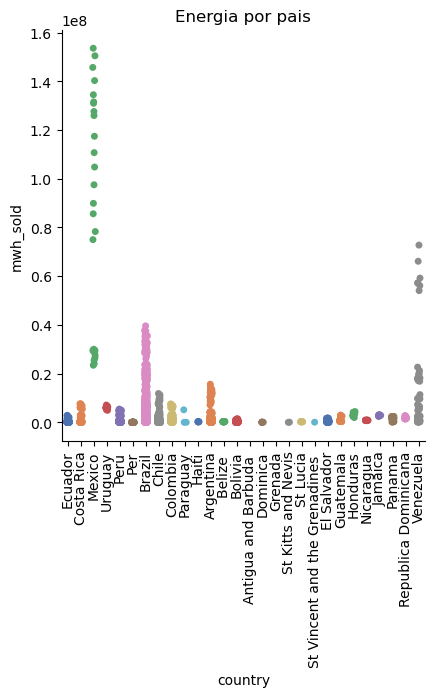

In [17]:
#Creamos gráfico de volumen de energía por país

g=sns.catplot(data=df, x="country", y="mwh_sold",  palette="deep").set(title='Energia por pais')

#Agregamos rotacion a las etiquetas del gráfico
g.set_xticklabels(rotation=90)

En la gráfica anterior se observa claramente que el nivel de consumo energético de México es notablemente superior al resto, pero con un índice de pérdidas muy "normal" (alrededor del 10% de la energía consumida). Dicho país corresponde a los registros atípicos observados en la anterior gráfica. 

[Text(0.5, 1.0, 'Distribución de cantidad de interrupciones')]

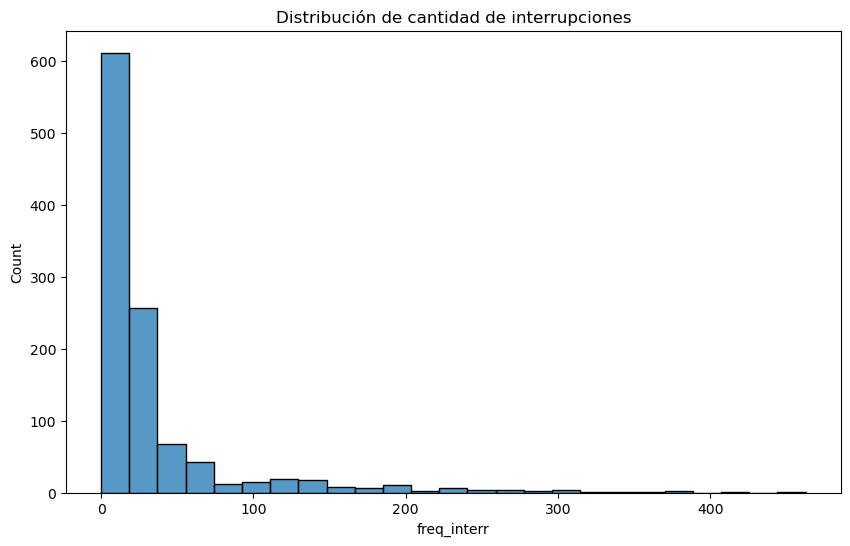

In [18]:
#Se busca graficar en un histograma la distribución de las frecuencias de interrupción del suministro eléctrico a los abonados

df['freq_interr'] = pd.to_numeric(df['freq_interr'], errors='coerce')

#Se desea conocer la distribución de estos datos mediante un histograma  (numero de interrupciones por año)

sns.histplot(data=df, x="freq_interr", bins=25).set(title='Distribución de cantidad de interrupciones')


Se observa que la distribución de la frecuencia de interrupción en su mayoría se agrupa en el intervalo menor a 25 interrupciones por año por usuario

## 6. Comentarios finales

Para proximas entregas se mejorará el acondicionamiento del Dataset verificando que se normalice el tipo de dato en los campos nnumericos. 

Se considerara reemplazar los nombres de pais por nombres cortos para mejorar la legibilidad cuando se grafiquen datos por pais. 

Se considera recomendable ahondar en la mejora de los colores y datos mostrados en los graficos.